In [25]:
import librosa
import numpy as np
import random
import rosbag
import struct
import tams_pr2_guzheng
from collections import Counter
import pandas as pd
import scipy.stats as stats

from matplotlib import pyplot as plt
import matplotlib as mpl
mpl.style.use('seaborn-v0_8')
from matplotlib.animation import FuncAnimation
from IPython import display
import sklearn.gaussian_process as gp

%load_ext autoreload
%autoreload 1
import sys
if '../utils' not in sys.path:
    sys.path.append('../utils')
import u
%aimport u

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


(0.06081945211588333, 1.0239148015558943)

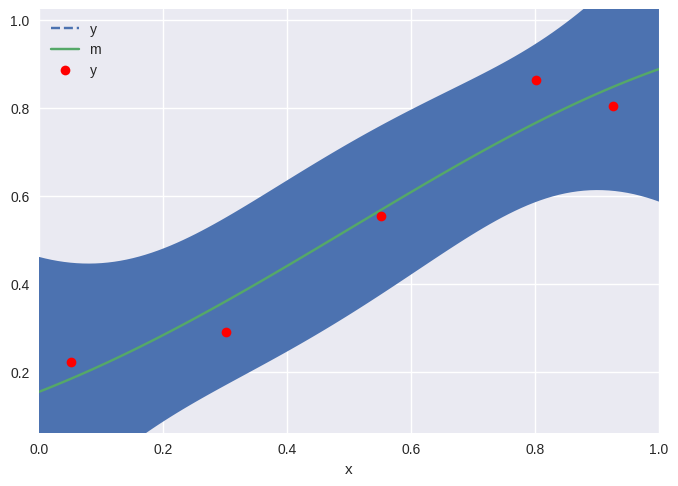

In [145]:
U= stats.uniform(0,1)
X= sorted(stats.qmc.Halton(1).random(5).ravel())
Y= U.rvs(5)
D=pd.DataFrame(np.vstack((X,Y)).T, columns=['x', 'y'])
ax = D.plot('x', 'y', style='--')
GP= gp.GaussianProcessRegressor(alpha=1e-2)
GP.fit(D['x'].to_numpy().reshape((-1,1)), D['y'])
Xg= np.linspace(0,1,100)
Yg= GP.predict(Xg.reshape(-1,1), return_std= True)
Dg= pd.DataFrame(np.vstack((Xg,Yg)).T, columns=['x', 'm', 's'])
ax.fill_between(
     Dg['x'],
     Dg['m']-3*Dg['s'],
     Dg['m']+3*Dg['s']);
Dg.plot('x', 'm', ax=ax)
D.plot('x','y', style='or', ax= ax)
ax.set_xlim(min(Xg), max(Xg))
ax.set_ylim(
    min(Y)-(max(Y)-min(Y))/4,
    max(Y)+(max(Y)-min(Y))/4
    )


In [116]:
Dg['m']-Dg['s']

0     0.673462
1     0.581648
2     0.497931
3     0.422014
4     0.353594
        ...   
95    1.370542
96    1.446783
97    1.528746
98    1.616619
99    1.710592
Length: 100, dtype: float64

In [ ]:
plt.fill_between()

In [105]:
Dg.size

300